In [1]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

Python Version 3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
Numpy Version 1.22.2
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2

In [3]:
from Scripts.experiments import create_precision_recall_curves
from Scripts.experiments import create_precision_recall_curves_all
from Scripts.experiments import get_cms_for_betas_antGLasso
from Scripts.experiments import make_cm_plots_antGLasso

# scBiGLasso Easy

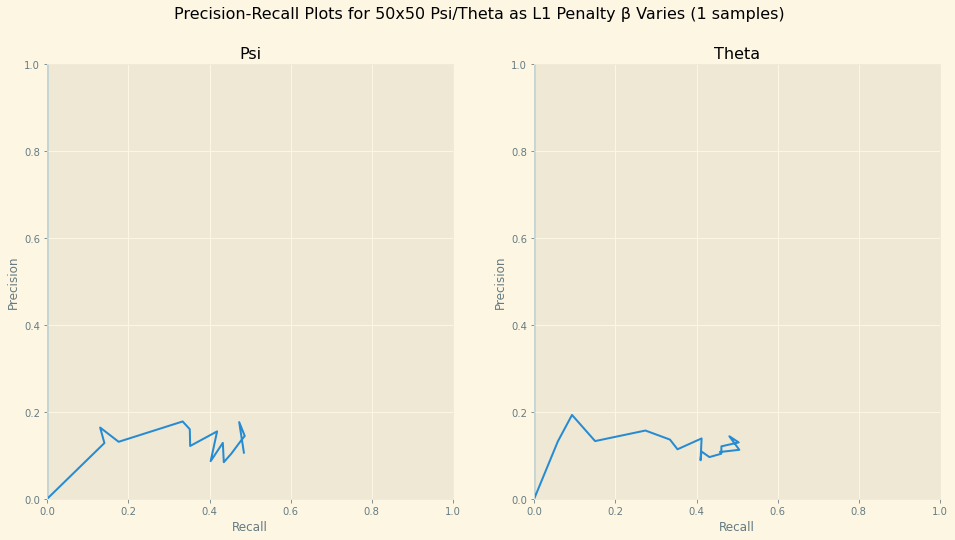

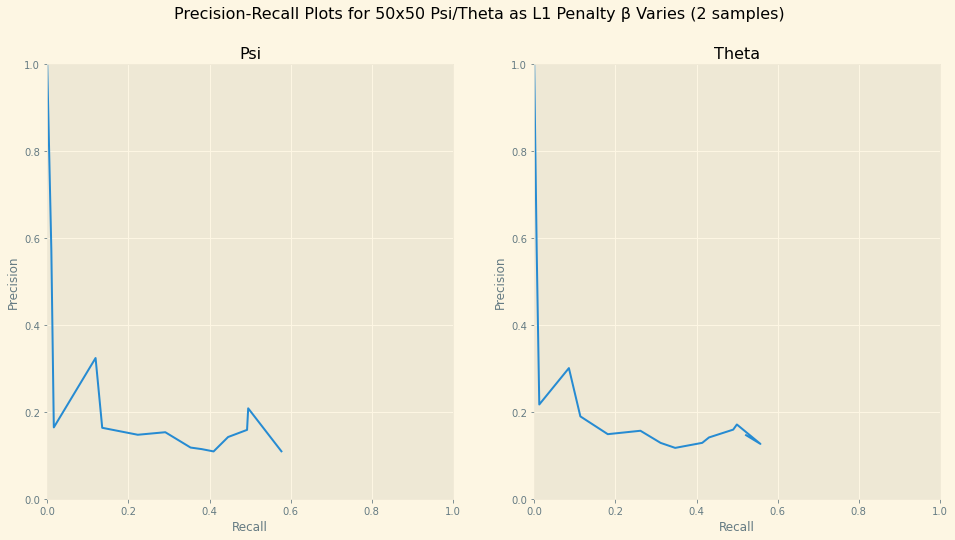

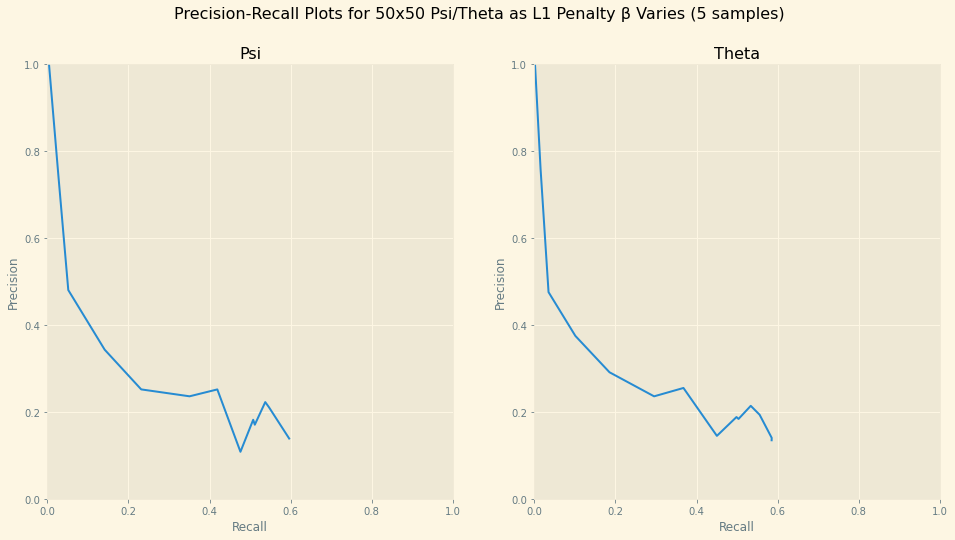

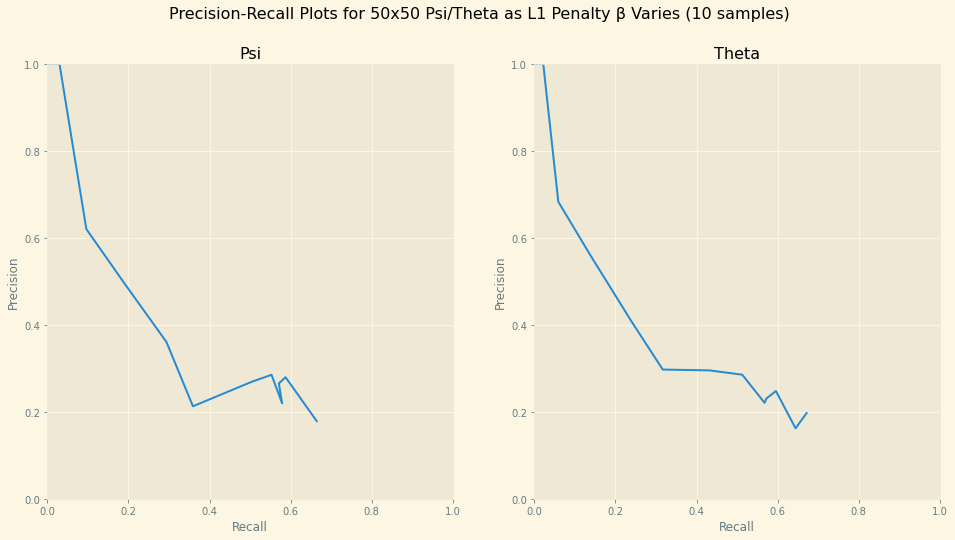

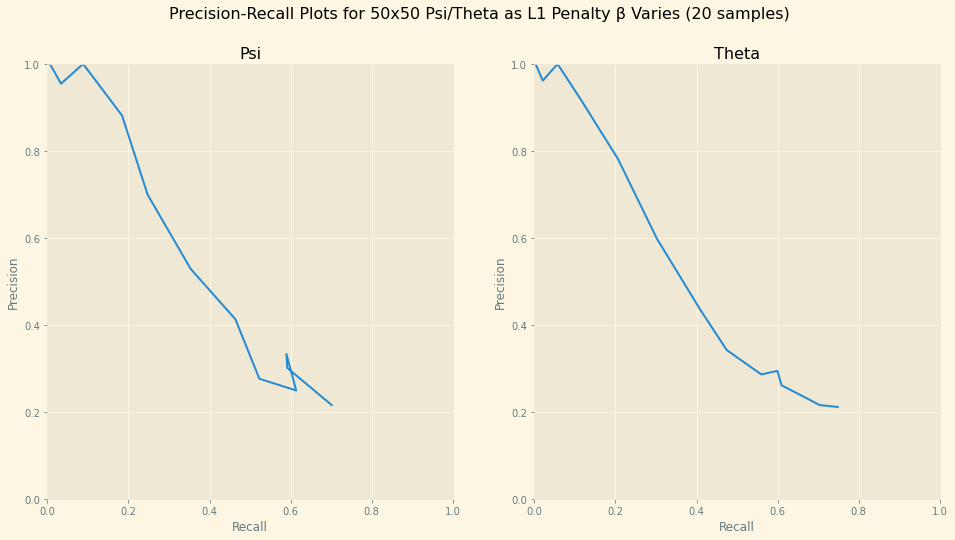

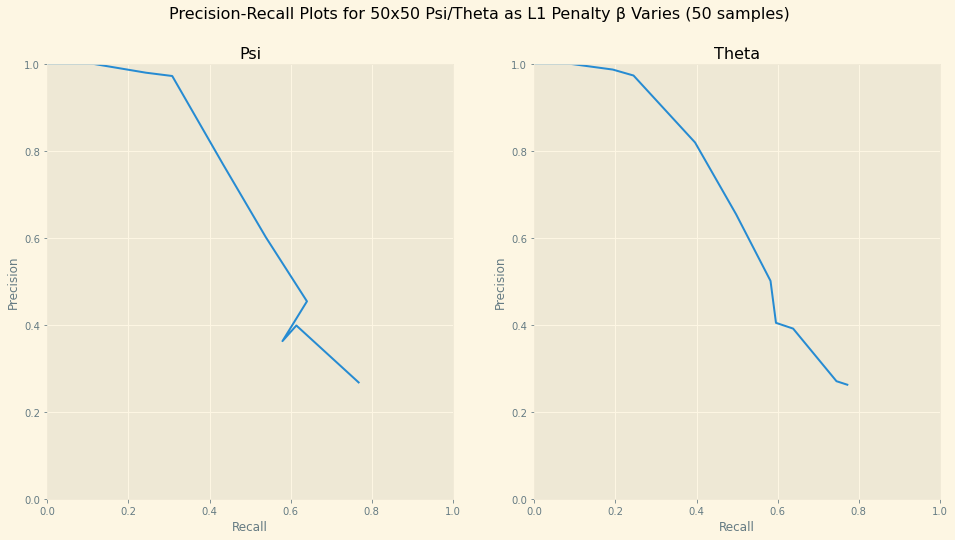

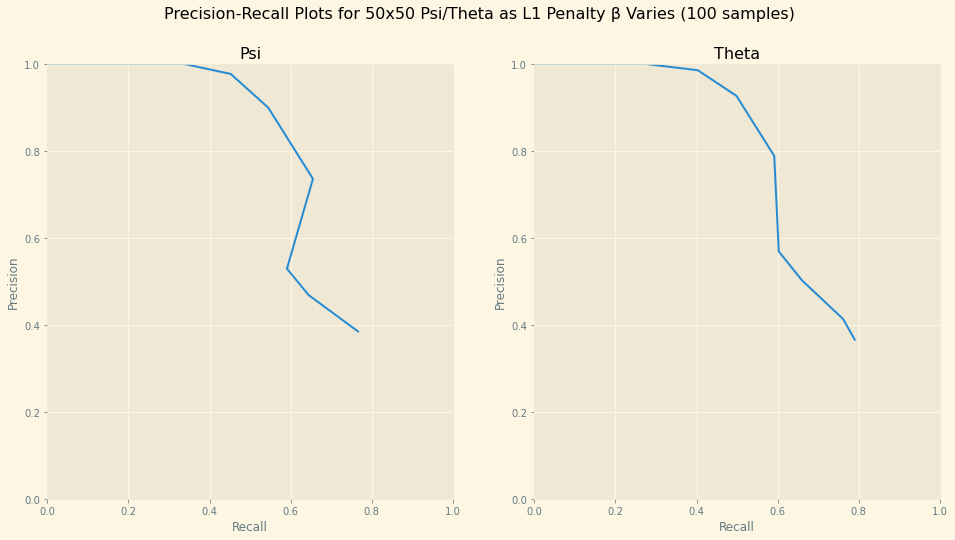

In [33]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for scBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-1, 1, 0.1), # 50
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=5, # Too slow for more attempts!
        indices_to_highlight=[],
        alg="scBiGLasso",
        df_scale=2
    )
    fig.savefig(f'../../Plots/Vary Samples - scBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}')
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

## anBiGLasso Easy

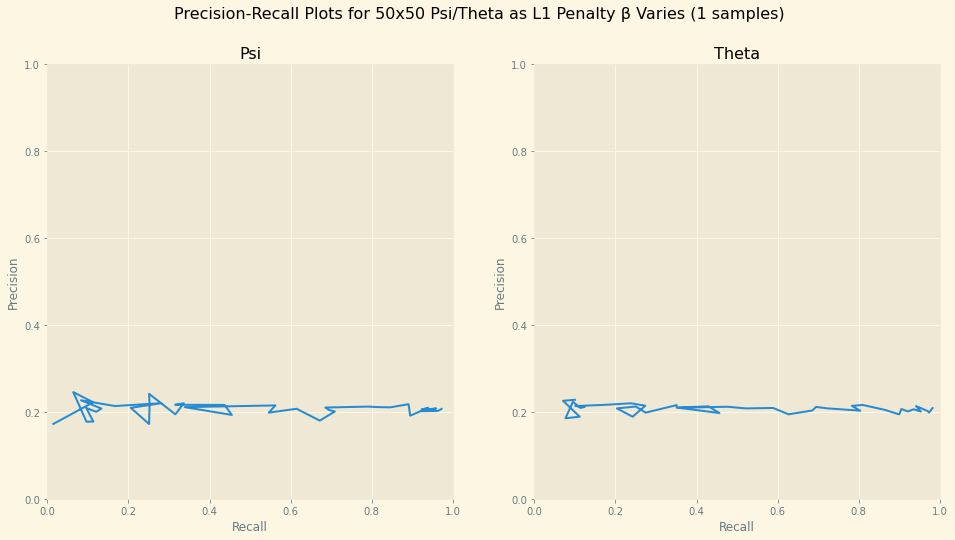

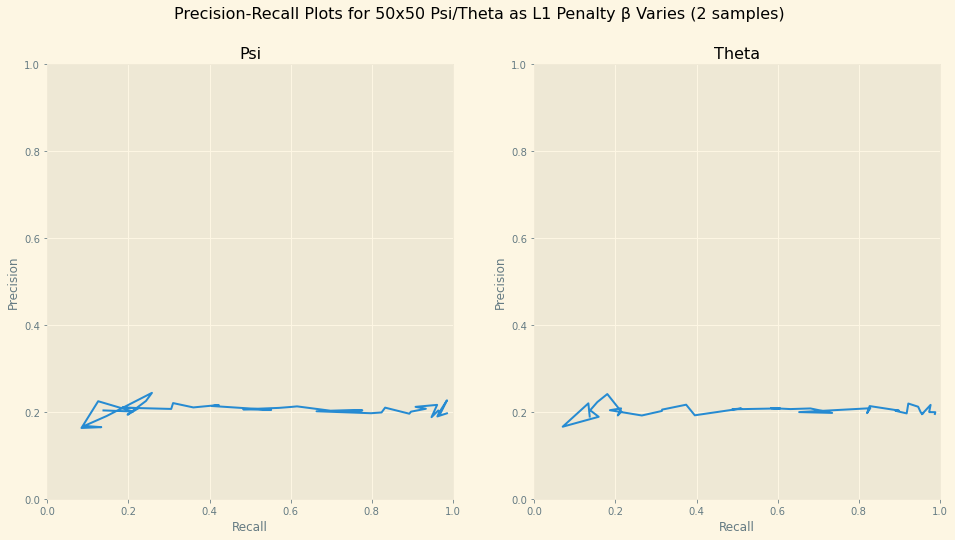

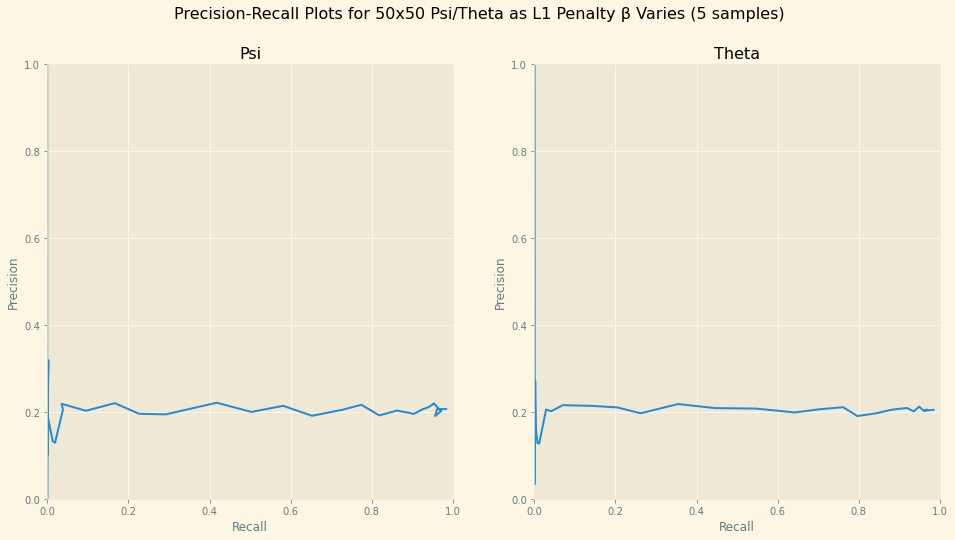

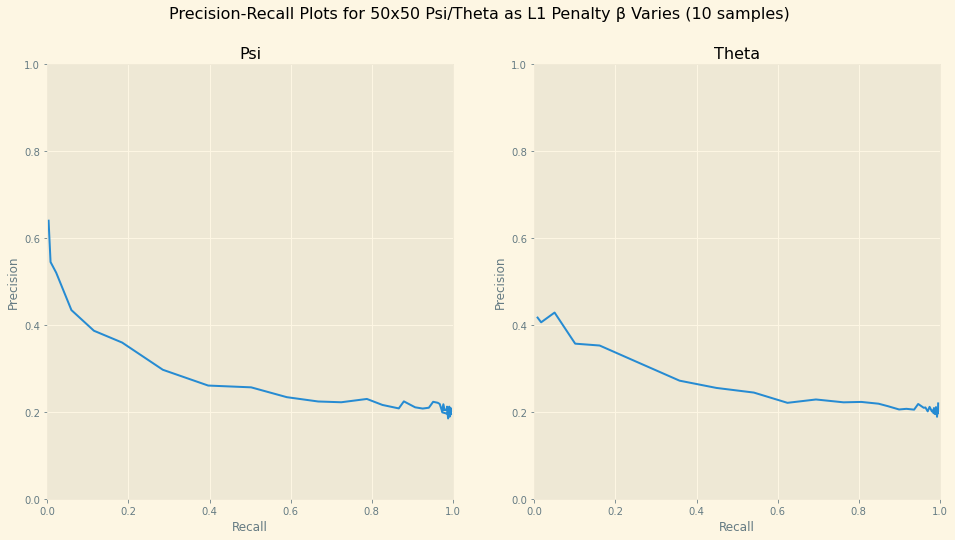

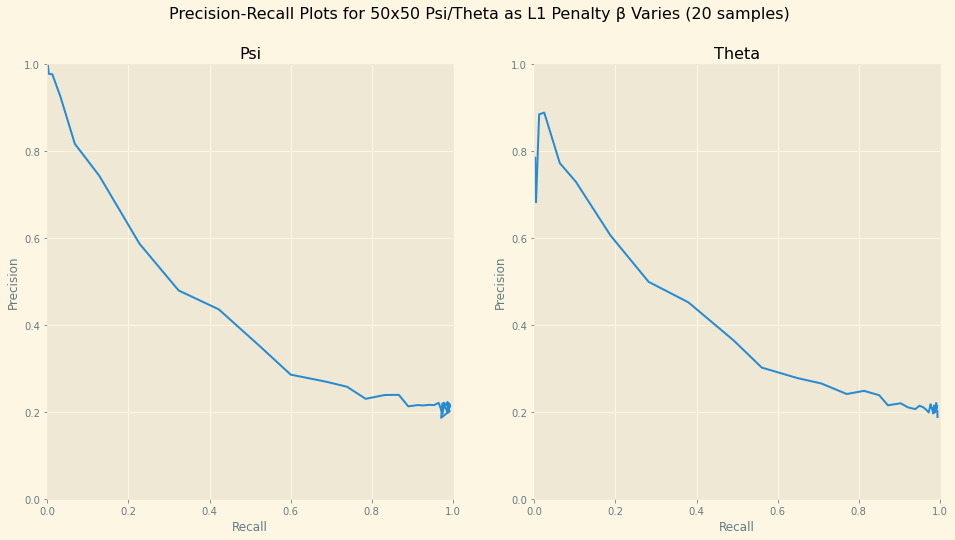

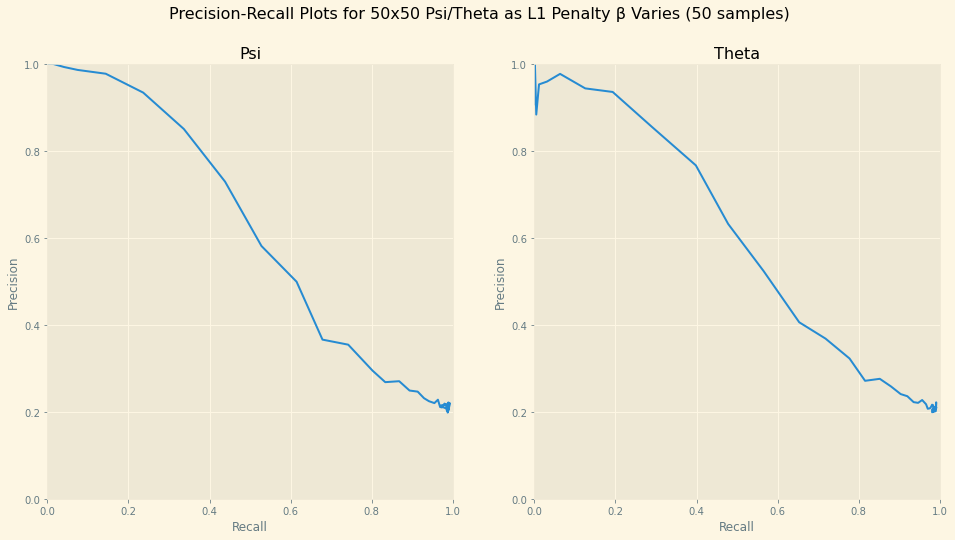

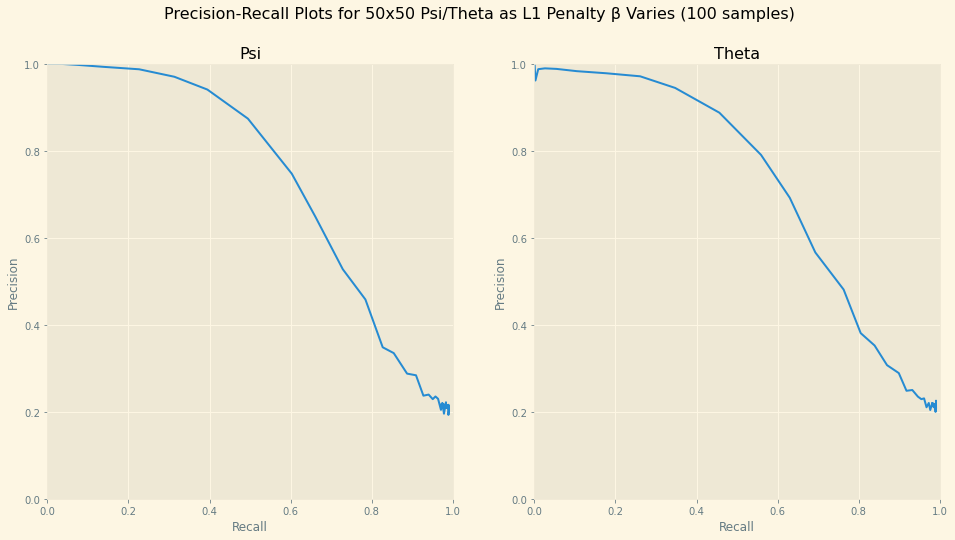

In [66]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for anBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(2, 6, 0.1),
    10**np.arange(2, 6, 0.1),
    10**np.arange(-2, 2, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=50,
        indices_to_highlight=[],
        alg="anBiGLasso",
        df_scale=2,
        B_approx_iters=10,
        cm_mode='Nonzero'
    )
    #fig.savefig(
    #    f'../../Plots/Vary Samples - anBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    #)
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

# EiGLasso Easy

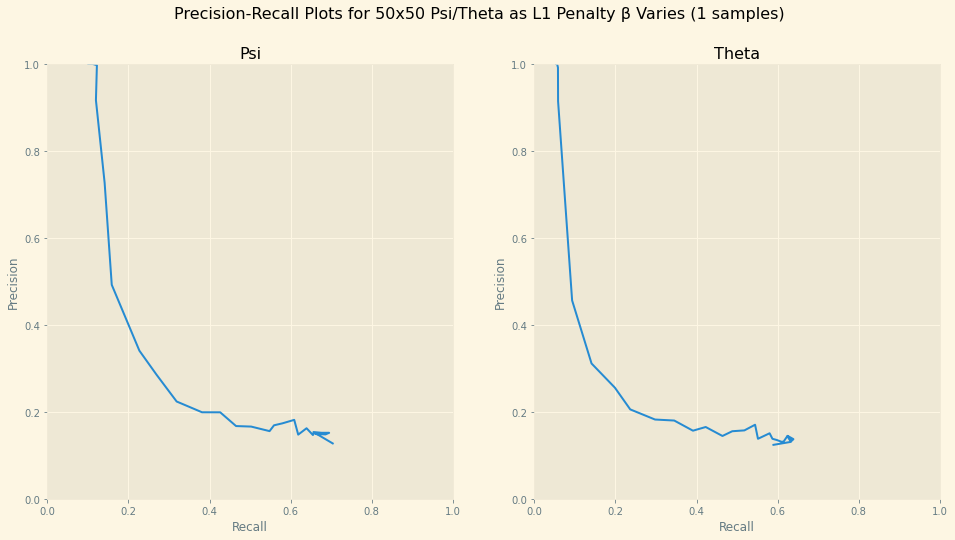

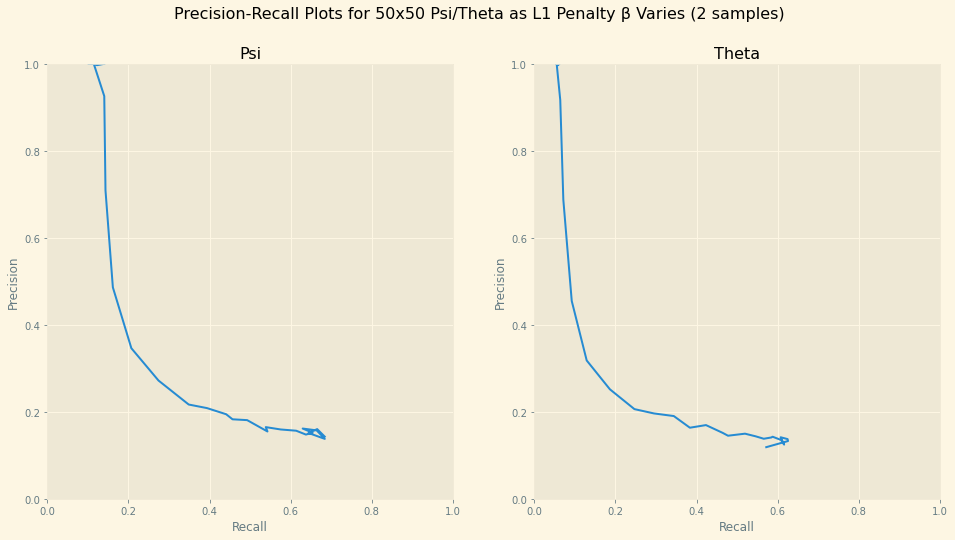

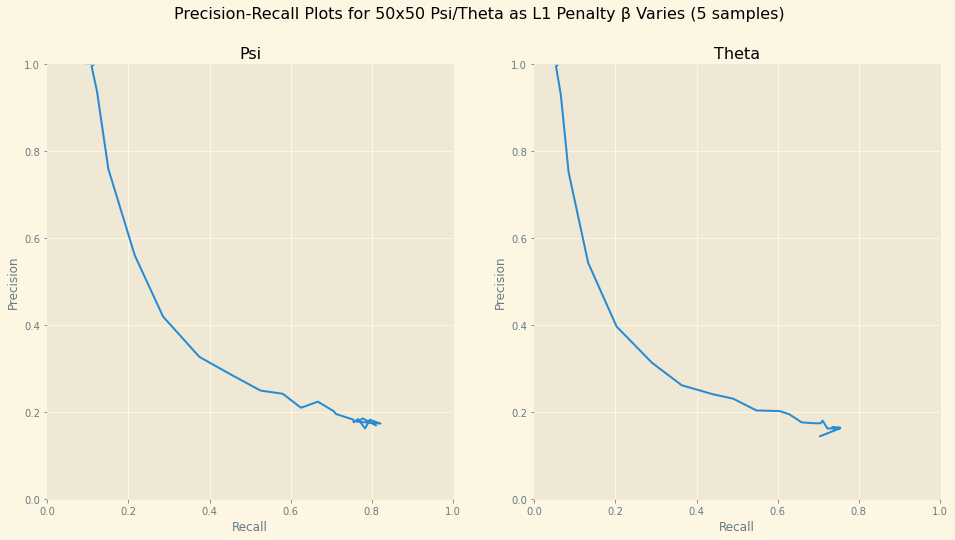

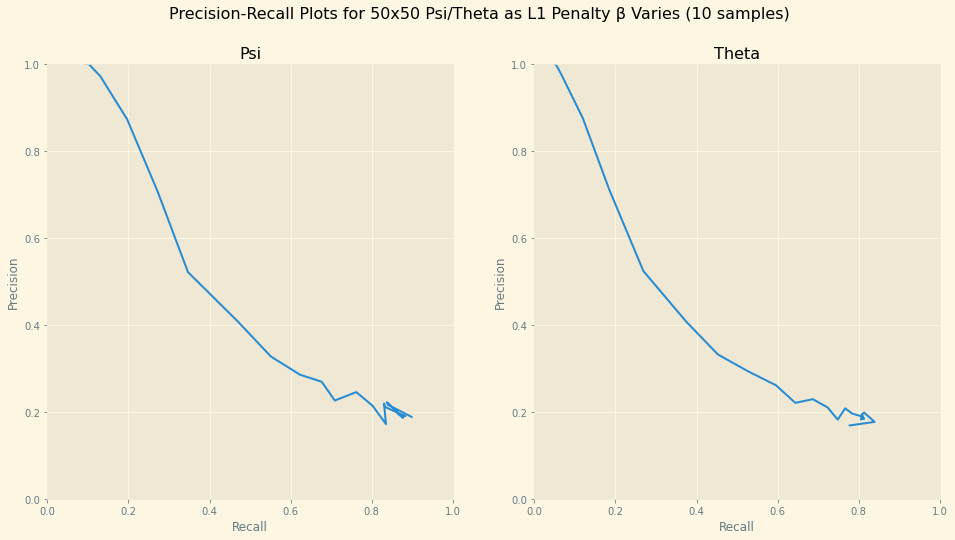

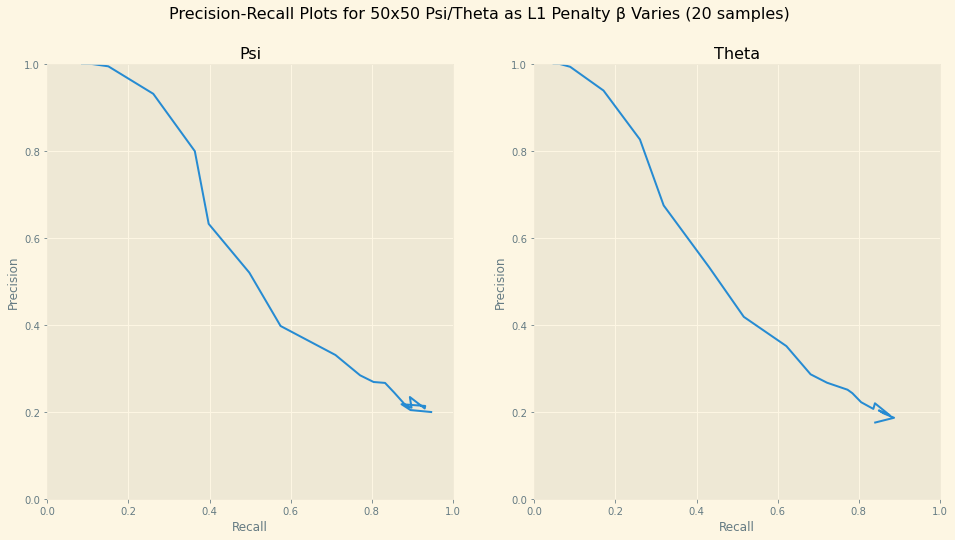

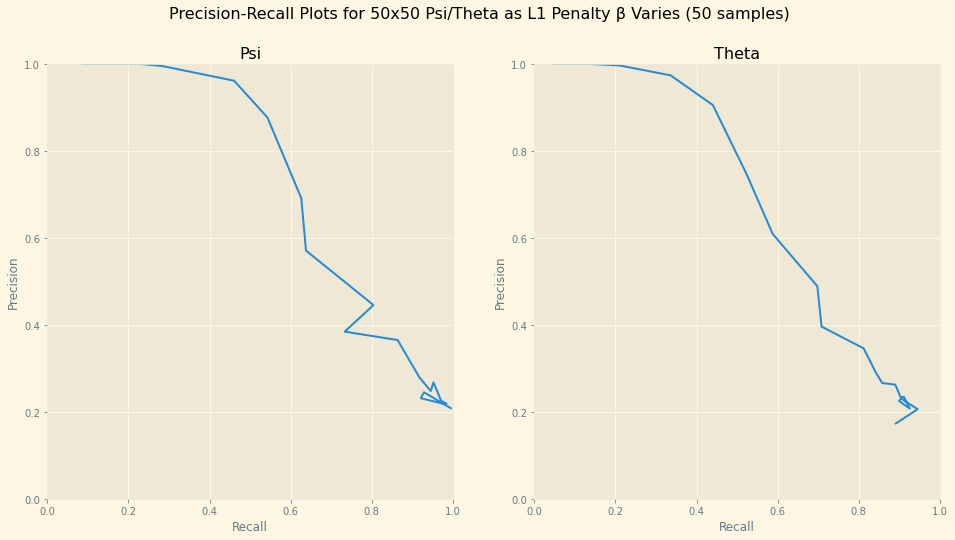

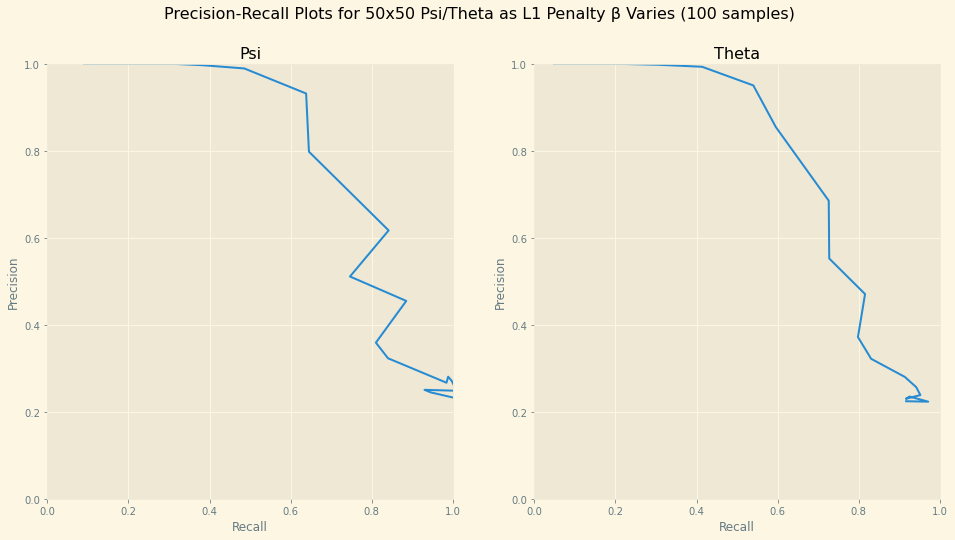

In [48]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for EiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-3, 0, 0.1), # 50
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=25,
        indices_to_highlight=[],
        alg="EiGLasso",
        df_scale=2
    )
    fig.savefig(
        f'../../Plots/Vary Samples - EiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    )
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

# All Together

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: scBiGLasso
	Trying beta=0.100000
	Trying beta=

ValueError: too many values to unpack (expected 2)

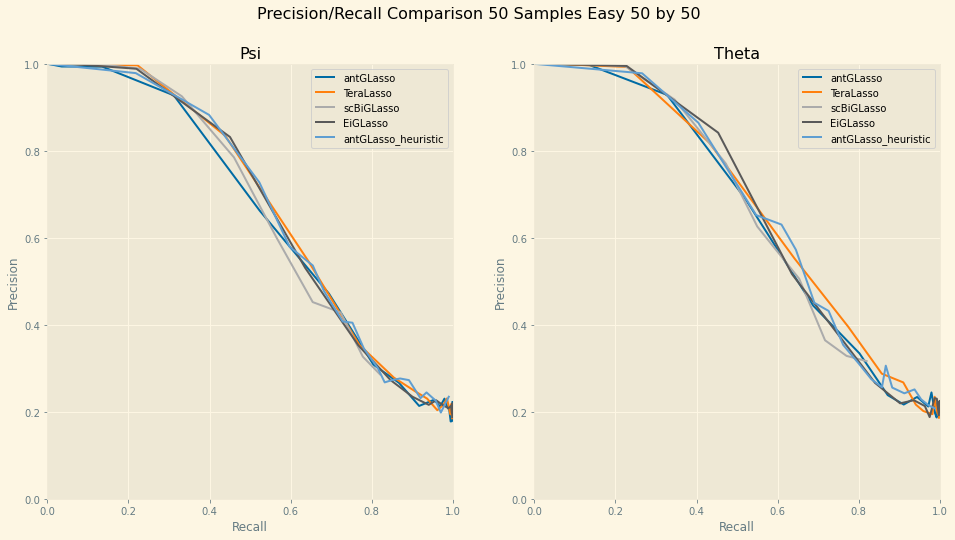

In [364]:
fig, axs = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #Tera
        10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #EiG
        #10**np.arange(-6, -2, 0.2), #an_cov
        np.arange(0, 1., 0.05) #ant_heur
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso",
        "scBiGLasso",
        "EiGLasso",
        #"anBiGLasso_cov",
        "antGLasso_heuristic"
    ],
    m=50,
    p=50,
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 50 Samples Easy 50 by 50",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 50 Samples'
)

In [4]:
fig, axs, data_out = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(2, 6, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #Tera
        #10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #Eig
        np.arange(0., 1., 0.05) # ant_heur
        #10**np.arange(-6, -2, 0.2), #an_cov
        #10**np.arange(-4, 0, 0.2) #anBiG
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso",
        #"scBiGLasso", # Ommitted b/c it takes too long
        "EiGLasso",
        "antGLasso_heuristic"
        #"anBiGLasso_cov",
        #"anBiGLasso"
    ],
    m=1,
    p=50,
    attempts=100
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 1 Sample Easy 50 by 50",
    verbose=True
)
#fig.savefig(
#    f'../../Plots/Precision-Recall/Easy 1 Sample'
#)
#np.save(f'../../Data for Plots/PR 1 of 50x50', data_out)

Trying algorithm: antGLasso
	Trying beta=100.000000
	Trying beta=158.489319
	Trying beta=251.188643
	Trying beta=398.107171
	Trying beta=630.957344
	Trying beta=1000.000000
	Trying beta=1584.893192
	Trying beta=2511.886432
	Trying beta=3981.071706
	Trying beta=6309.573445
	Trying beta=10000.000000
	Trying beta=15848.931925
	Trying beta=25118.864315
	Trying beta=39810.717055
	Trying beta=63095.734448
	Trying beta=100000.000000
	Trying beta=158489.319246
	Trying beta=251188.643151
	Trying beta=398107.170554
	Trying beta=630957.344480
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251


Operation terminated by user during teralasso>eval_cond


In teralasso (line 55)
        [result,result1,logdetN] = eval_cond(PsiN,Psi,M,S,ps,zeta,logdet,kappa);



the MATLAB function has been cancelled


TypeError: 'NoneType' object is not iterable

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: EiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957


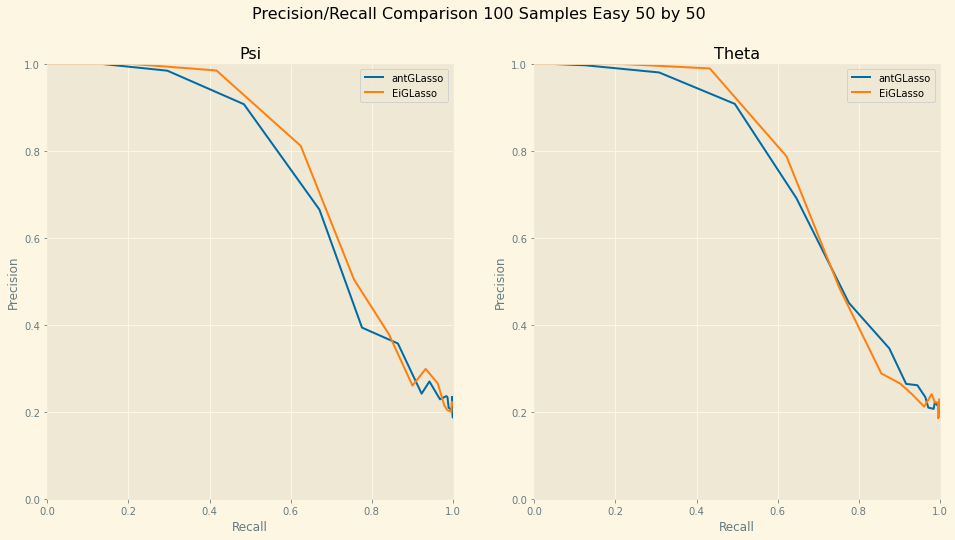

In [47]:
fig, axs, data_out = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        #10**np.arange(-4, 0, 0.2), #Tera
        #10**np.arange(-1.5, 0.5, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #Eig
        #np.arange(0, 1, 0.05), #an_heur
        #10**np.arange(-6, -2, 0.2), #anBiGLasso_cov
        #10**np.arange(-4, 0, 0.2), #anBiGLasso
    ]),
    algorithms=[
        "antGLasso",
        #"TeraLasso",
        #"scBiGLasso",
        "EiGLasso",
        #"antGLasso_heuristic",
        #"anBiGLasso_cov",
        #"anBiGLasso"
    ],
    m=100,
    p=50,
    attempts=10,#100,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 100 Samples Easy 50 by 50",
    verbose=True
)
#fig.savefig(
#    f'../../Plots/Precision-Recall/Easy 100 Samples'
#)
#np.save(f'../../Data for Plots/PR 100 of 50x50', data_out)

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: scBiGLasso
	Trying beta=0.100000
	Trying beta=

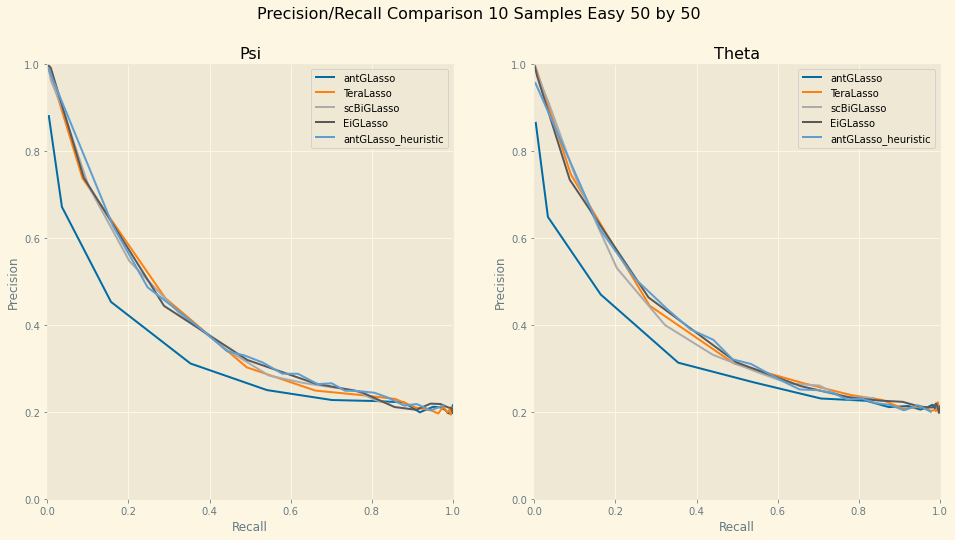

In [368]:
fig, axs, data_out = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #Tera
        10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #Eig
        np.arange(0, 1., 0.05), #an_heur
        #10**np.arange(-6, -2, 0.2), #an_cov
        #10**np.arange(-4, 0, 0.2) #anBiG
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso",
        "scBiGLasso",
        "EiGLasso",
        "antGLasso_heuristic",
        #"anBiGLasso_cov",
        #"anBiGLasso"
    ],
    m=10,
    p=50,
    attempts=100,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 10 Samples Easy 50 by 50",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 10 Samples'
)
np.save(f'../../Data for Plots/PR 10 of 50x50', data_out)

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: scBiGLasso
	Trying beta=0.100000
	Trying beta=

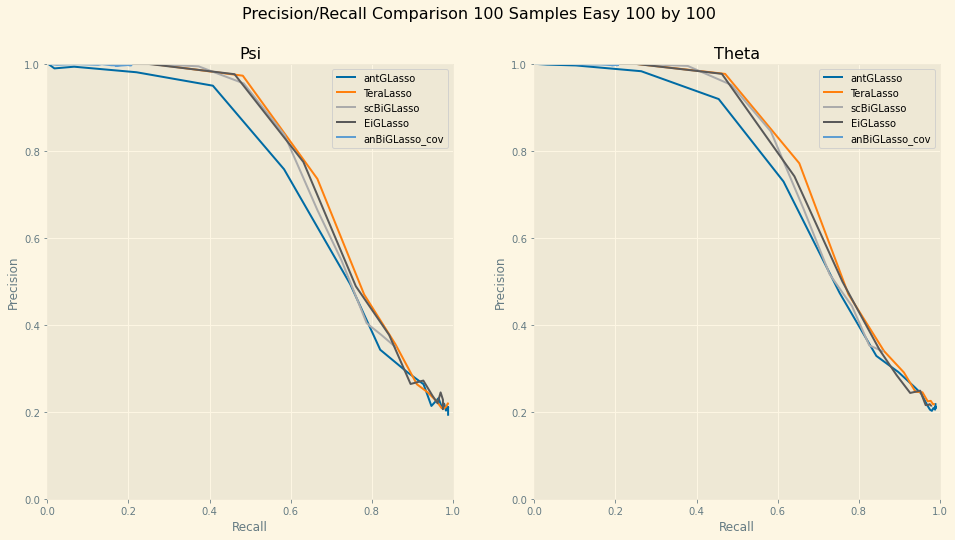

In [308]:
fig, axs, data_out = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #Tera
        10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #Eig
        10**np.arange(-6, -2, 0.2), #an_cov
        #10**np.arange(-4, 0, 0.2) #anBiG
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso",
        "scBiGLasso",
        "EiGLasso",
        "anBiGLasso_cov",
        #"anBiGLasso"
    ],
    m=100,
    p=100,
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 100 Samples Easy 100 by 100",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 100 Samples 100x100'
)
np.save(f'../../Data for Plots/PR 100 of 100x100', data_out)

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000251
	Trying beta=0.000631
	Trying beta=0.001585
	Trying beta=0.003981
	Trying beta=0.010000
	Trying beta=0.025119
	Trying beta=0.063096
	Trying beta=0.158489
	Trying beta=0.398107


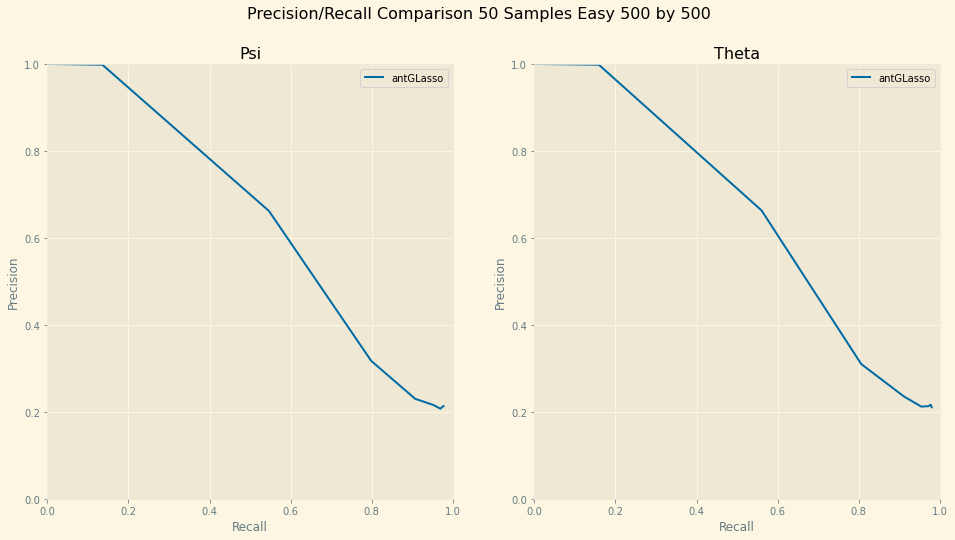

In [310]:
fig, axs, data_out = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.4), #ant
    ]),
    algorithms=[
        "antGLasso",
    ],
    m=50,
    p=500,
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 50 Samples Easy 500 by 500",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 50 Samples 500x500'
)
np.save(f'../../Data for Plots/PR 50 of 500x500', data_out)

# Tensor Data

In [298]:
from Scripts.experiments import create_precision_recall_curves_tensor

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: antGLasso_heuristic
	Trying beta=0.000000
	Try

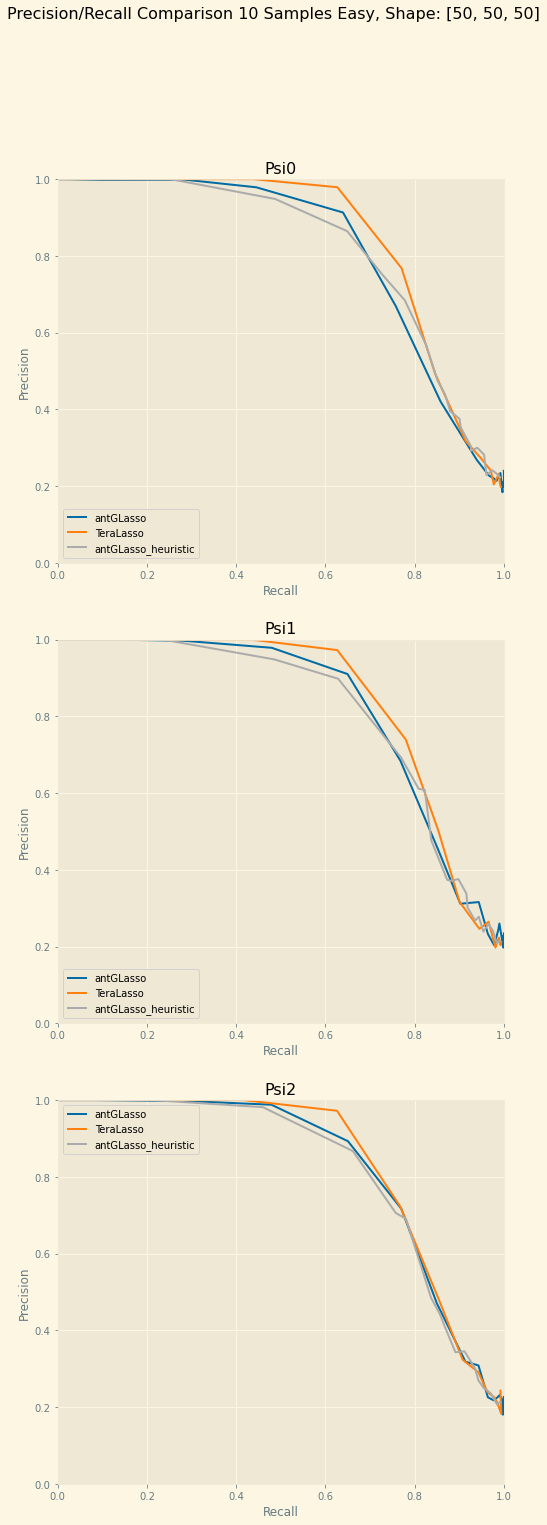

In [359]:
fig, axs, data_out = create_precision_recall_curves_tensor(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #tera
        np.arange(0, 1, 0.05), #ant_heur
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso",
        "antGLasso_heuristic"
    ],
    m=(m:=10),
    ds=(ds:=[50, 50, 50]),
    attempts=20,#100
    df_scale=2,
    cm_mode="Nonzero",
    title=f"Precision/Recall Comparison {m} Samples Easy, Shape: {ds}",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Tensor {ds} Easy {m} Samples'
)
np.save(f'../../Data for Plots/PR 10 of 50x50x50', data_out)

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: antGLasso_heuristic
	Trying beta=0.000000
	Try

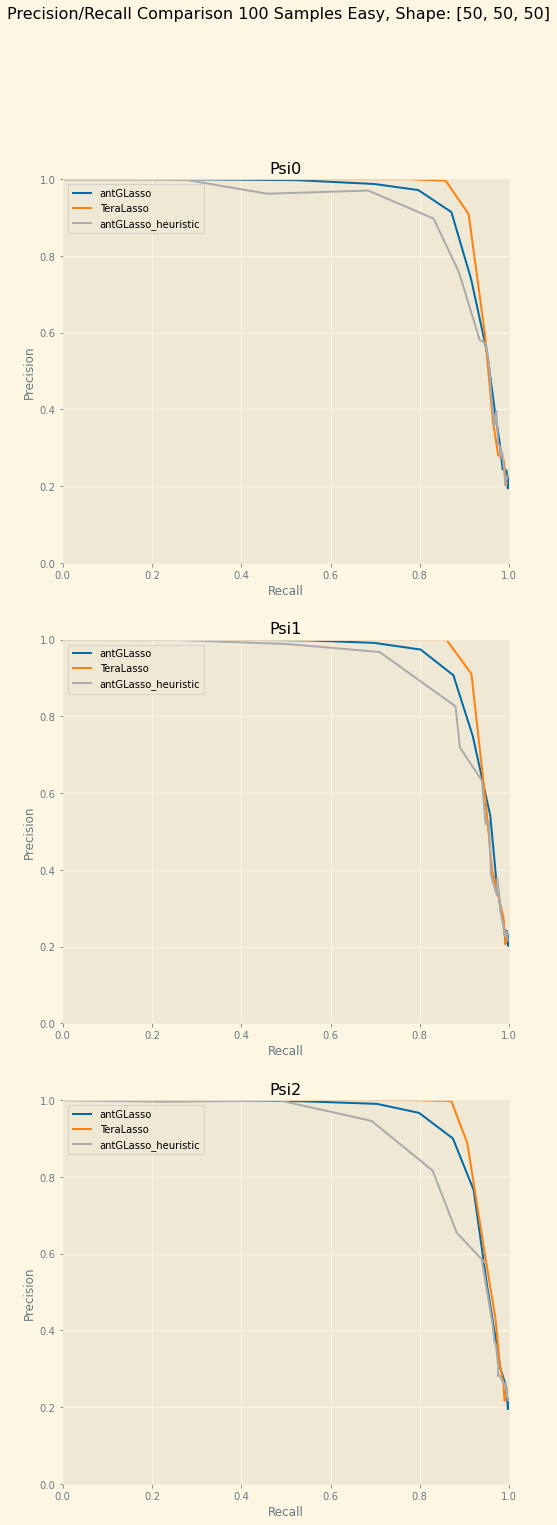

In [360]:
fig, axs, data_out = create_precision_recall_curves_tensor(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #tera,
        np.arange(0, 1., 0.05) # an_heur
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso",
        "antGLasso_heuristic"
    ],
    m=(m:=100),
    ds=(ds:=[50, 50, 50]),
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title=f"Precision/Recall Comparison {m} Samples Easy, Shape: {ds}",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Tensor {ds} Easy {m} Samples'
)
np.save(f'../../Data for Plots/PR 100 of 50x50x50', data_out)

# Compare effect of samples for just antGLasso

	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying be

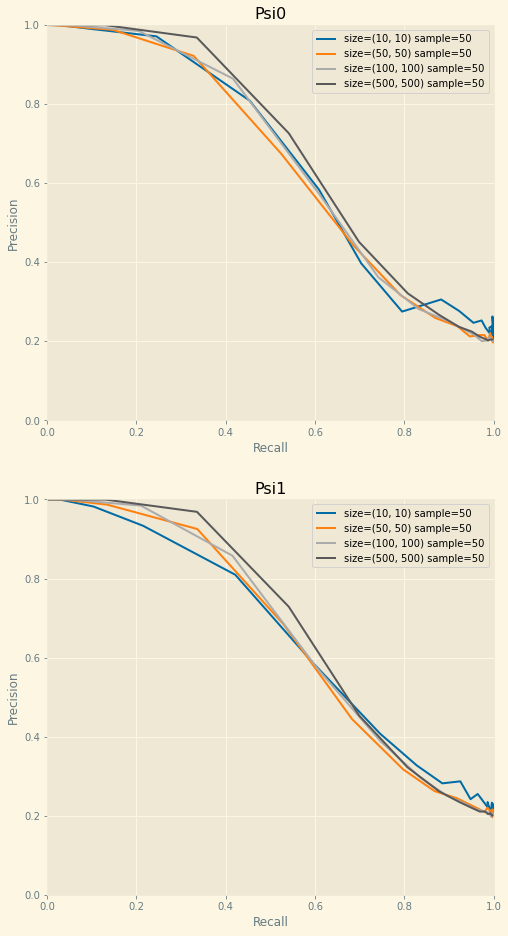

In [370]:
data_out = get_cms_for_betas_antGLasso(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #Size 10 Sample 50
        10**np.arange(-4, 0, 0.2), #Size 50 Sample 50
        10**np.arange(-4, 0, 0.2), #Size 100 Sample 50
        10**np.arange(-4, 0, 0.2), #Size 1000 Sample 50
    ]),
    attempts=100,
    cm_mode="Nonzero",
    verbose=True,
    sizes=[(10, 10), (50, 50), (100, 100), (500, 500)],
    samples=[50]
)
make_cm_plots_antGLasso(
    Psis_cms=data_out,
    sizes=[(10, 10), (50, 50), (100, 100), (500, 500)],
    samples=[50]
)
np.save(f'../../Data for Plots/PR antGLasso vary sizes', data_out)

	Trying beta=100.000000
	Trying beta=158.489319
	Trying beta=251.188643
	Trying beta=398.107171
	Trying beta=630.957344
	Trying beta=1000.000000
	Trying beta=1584.893192
	Trying beta=2511.886432
	Trying beta=3981.071706
	Trying beta=6309.573445
	Trying beta=10000.000000
	Trying beta=15848.931925
	Trying beta=25118.864315
	Trying beta=39810.717055
	Trying beta=63095.734448
	Trying beta=100000.000000
	Trying beta=158489.319246
	Trying beta=251188.643151
	Trying beta=398107.170554
	Trying beta=630957.344480
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
	Trying beta=0.000100
	Trying beta=0.000158
	Tryin

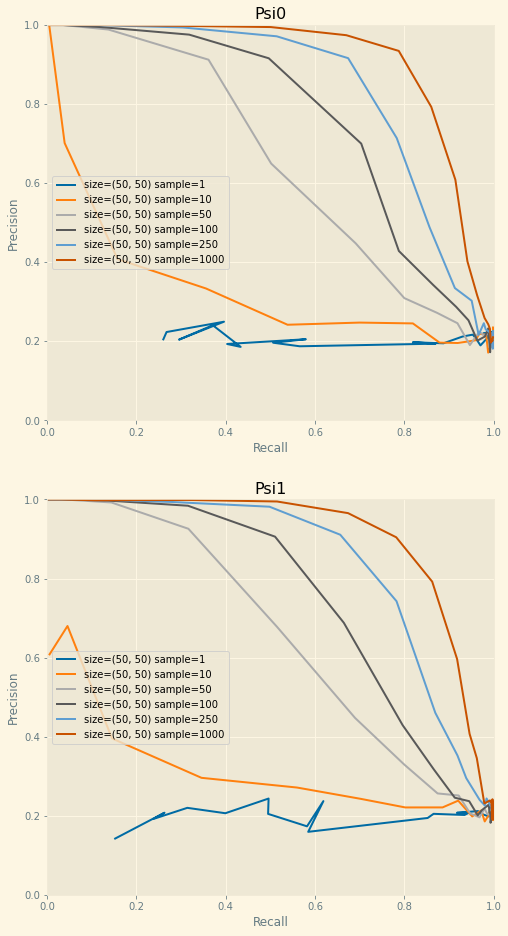

In [369]:
data_out = get_cms_for_betas_antGLasso(
    betas_to_try=np.array([
        10**np.arange(2, 6, 0.2), #Size 50 Sample 1
        10**np.arange(-4, 0, 0.2), #Size 50 Sample 10
        10**np.arange(-4, 0, 0.2), #Size 50 Sample 50
        10**np.arange(-4, 0, 0.2), #Size 50 Sample 100
        10**np.arange(-4, 0, 0.2), #Size 50 Sample 250
        10**np.arange(-4, 0, 0.2), #Size 50 Sample 1000
    ]),
    attempts=100,
    cm_mode="Nonzero",
    verbose=True,
    sizes=[(50, 50)],
    samples=[1, 10, 50, 100, 250, 1000]
)
make_cm_plots_antGLasso(
    Psis_cms=data_out,
    sizes=[(50, 50)],
    samples=[1, 10, 50, 100, 250, 1000]
)
np.save(f'../../Data for Plots/PR antGLasso vary samples', data_out)

# Sparsity-Estimation Regularization

	Trying beta=0.000000
	Trying beta=0.050000
	Trying beta=0.100000
	Trying beta=0.150000
	Trying beta=0.200000
	Trying beta=0.250000
	Trying beta=0.300000
	Trying beta=0.350000
	Trying beta=0.400000
	Trying beta=0.450000
	Trying beta=0.500000
	Trying beta=0.550000
	Trying beta=0.600000
	Trying beta=0.650000
	Trying beta=0.700000
	Trying beta=0.750000
	Trying beta=0.800000
	Trying beta=0.850000
	Trying beta=0.900000
	Trying beta=0.950000


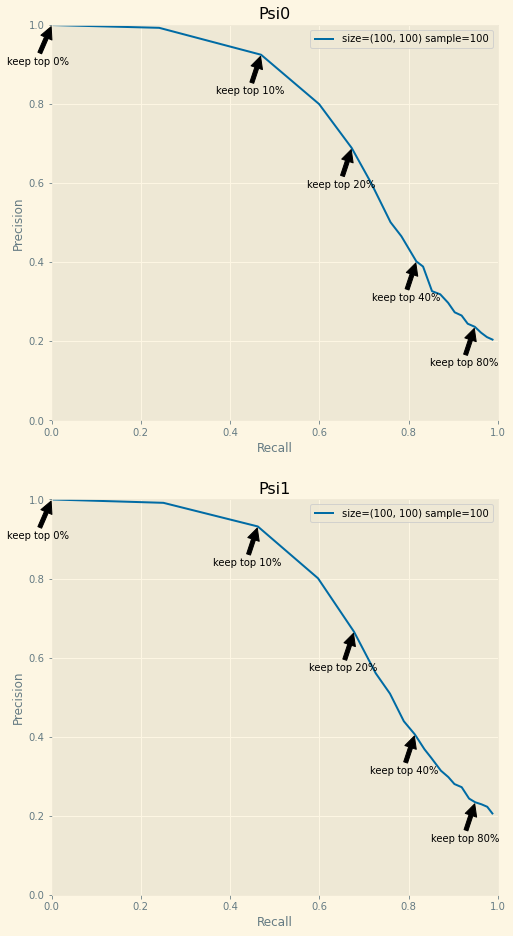

In [372]:
# The story is similar for other sizes
data_out = get_cms_for_betas_antGLasso(
    betas_to_try=(betas_to_try:=np.array([
        np.arange(0., 1, 0.05), #Size 100 Sample 100
    ])),
    attempts=100,
    cm_mode="Nonzero",
    verbose=True,
    sizes=[(100, 100)],
    samples=[100],
    try_sparsities=True
)
fig, _ = make_cm_plots_antGLasso(
    Psis_cms=data_out,
    sizes=[(100, 100)],
    samples=[100],
    betas_to_highlight=[[0, 2, 4, 8, 16]],
    betas=betas_to_try
)
np.save(f'../../Data for Plots/PR antGLasso sparsity-based regularization', data_out)

	Trying beta=0.000000
	Trying beta=0.050000
	Trying beta=0.100000
	Trying beta=0.150000
	Trying beta=0.200000
	Trying beta=0.250000
	Trying beta=0.300000
	Trying beta=0.350000
	Trying beta=0.400000
	Trying beta=0.450000
	Trying beta=0.500000
	Trying beta=0.550000
	Trying beta=0.600000
	Trying beta=0.650000
	Trying beta=0.700000
	Trying beta=0.750000
	Trying beta=0.800000
	Trying beta=0.850000
	Trying beta=0.900000
	Trying beta=0.950000


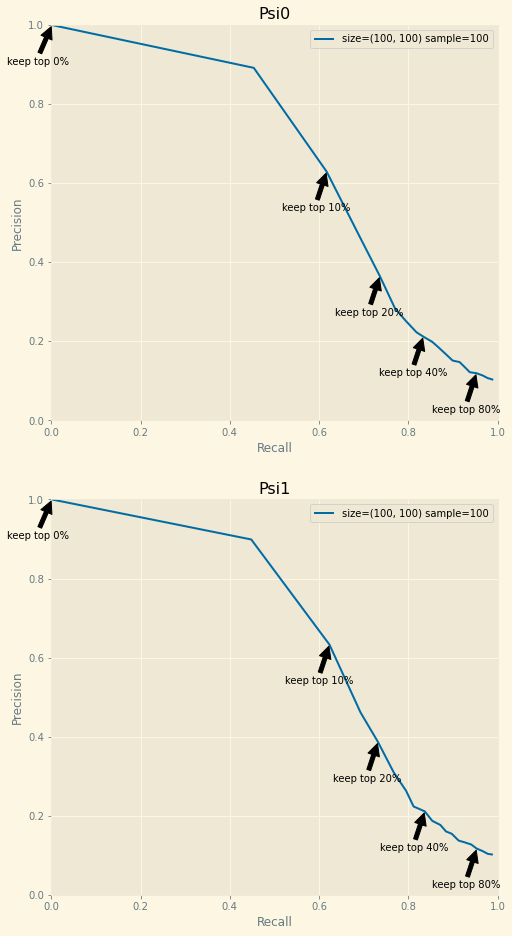

In [373]:
# The story is similar for other sizes
data_out = get_cms_for_betas_antGLasso(
    betas_to_try=(betas_to_try:=np.array([
        np.arange(0., 1, 0.05), #Size 100 Sample 100
    ])),
    attempts=100,
    cm_mode="Nonzero",
    verbose=True,
    sizes=[(100, 100)],
    samples=[100],
    try_sparsities=True,
    sparsity=0.1
)
fig, _ = make_cm_plots_antGLasso(
    Psis_cms=data_out,
    sizes=[(100, 100)],
    samples=[100],
    betas_to_highlight=[[0, 2, 4, 8, 16]],
    betas=betas_to_try
)
np.save(f'../../Data for Plots/PR antGLasso sparsity-based regularization 10pc', data_out)

	Trying beta=0.000000
	Trying beta=0.050000
	Trying beta=0.100000
	Trying beta=0.150000
	Trying beta=0.200000
	Trying beta=0.250000
	Trying beta=0.300000
	Trying beta=0.350000
	Trying beta=0.400000
	Trying beta=0.450000
	Trying beta=0.500000
	Trying beta=0.550000
	Trying beta=0.600000
	Trying beta=0.650000
	Trying beta=0.700000
	Trying beta=0.750000
	Trying beta=0.800000
	Trying beta=0.850000
	Trying beta=0.900000
	Trying beta=0.950000


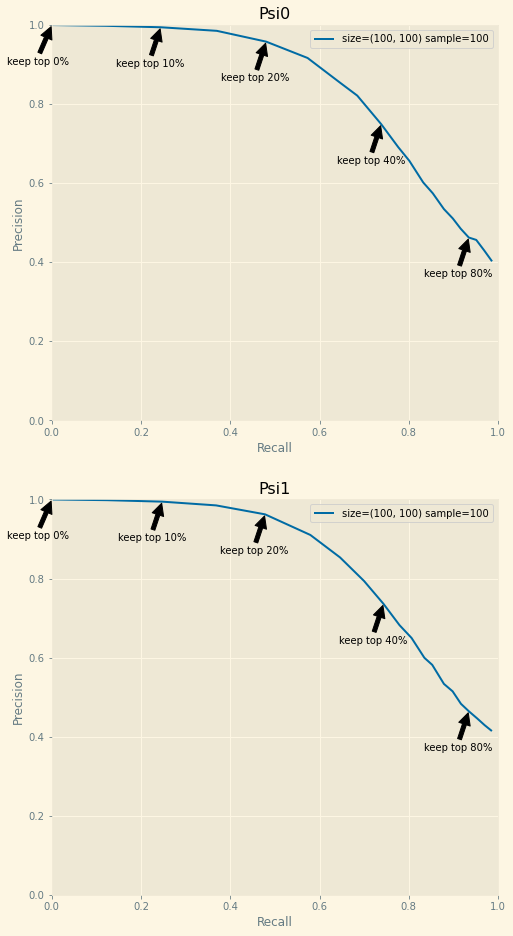

In [374]:
# The story is similar for other sizes
data_out = get_cms_for_betas_antGLasso(
    betas_to_try=(betas_to_try:=np.array([
        np.arange(0., 1, 0.05), #Size 100 Sample 100
    ])),
    attempts=100,
    cm_mode="Nonzero",
    verbose=True,
    sizes=[(100, 100)],
    samples=[100],
    try_sparsities=True,
    sparsity=0.4
)
fig, _ = make_cm_plots_antGLasso(
    Psis_cms=data_out,
    sizes=[(100, 100)],
    samples=[100],
    betas_to_highlight=[[0, 2, 4, 8, 16]],
    betas=betas_to_try
)
np.save(f'../../Data for Plots/PR antGLasso sparsity-based regularization 40pc', data_out)

# Sanity Checks

In [462]:
# Check sparsity
from Scripts.generate_data import generate_Ys
from Scripts.antGLasso import antGLasso
from Scripts.utilities import precision, recall, generate_confusion_matrices
sparsity = 0.2
sparsestimate = 0.2
sz = 100
Psis, Ys = generate_Ys(100, (sz, sz), expected_nonzero=int(sz**2 * sparsity))
print(np.count_nonzero(Psis[0]) / np.size(Psis[0])) # Will on average be `sparsity`
Psis_ = antGLasso(Ys, sparsities=[sparsestimate, sparsestimate])
print(np.count_nonzero(Psis_[0]) / np.size(Psis_[0]))
cm = generate_confusion_matrices(Psis_[0], Psis[0])
print(cm)
print((cm[0, 0] + cm[0, 1]) / (cm.sum()))
print(precision(cm))
print(recall(cm))

0.1822
0.2
[[1092.  908.]
 [ 630. 7270.]]
0.20202020202020202
0.546
0.6341463414634146


In [287]:
# Check that eigenvalue computation goes well
from Scripts.generate_data import generate_Ys
from Scripts.antGLasso import antGLasso
from Scripts.anBiGLasso import anBiGLasso
sparsity = 0.2
Psis, Ys = generate_Ys(100, (4, 3), expected_nonzero=int(3**2 * sparsity))
Psis_ = antGLasso(Ys, sparsities=[0.2, 0.2], B_approx_iters=1)
Psis_ = anBiGLasso(Ys, beta_1=0.2, beta_2=0.2, B_approx_iters=1)

In [330]:
# Understand sparsity of heuristic
from Scripts.antGLasso import antGLasso_heuristic, shrink_sparsities
from Scripts.nonparanormal_skeptic import nonparanormal_skeptic
Psis, Ys = generate_Ys(100, (50, 50), expected_nonzero=int(50**2 * sparsity))
Psis_ = antGLasso_heuristic(nonparanormal_skeptic(Ys), sparsities=[1, 1], B_approx_iters=10)
heur = shrink_sparsities(Psis_, sparsities=[1, 1])[0]
print(heur[heur==0])
print(heur[np.isnan(heur)])
print(heur[np.isinf(heur)])
print(np.max(heur))
print(np.min(heur))
print(np.mean(np.abs(heur)))
del heur

[]
[]
[]
0.026078890551473898
-0.9798370643851045
0.021615984387174984
